# Data Science - Team 15 (Group 4 INT-A)

# Iteration 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('set15_it1.csv')

In [3]:
df

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,sqft
1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,sqft
2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,sqft
3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,sqft
4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,sqft
...,...,...,...,...,...,...,...
2358,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,sqft
2359,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,sqft
2360,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,sqft
2361,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,sqft


## 1. Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DI              2363 non-null   int64  
 1   TradeValue      2363 non-null   float64
 2   RealmType       2363 non-null   object 
 3   Enclave         2363 non-null   object 
 4   LivingQuarters  2245 non-null   float64
 5   ParcelSize      2363 non-null   float64
 6   ParcelSizeUnit  2363 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 129.4+ KB


In [5]:
df.describe()

,DI,TradeValue,LivingQuarters,ParcelSize
count,2363.000000,2363.000000,2245.000000,2363.000000
mean,1169.813796,181150.568007,1157.071715,9889.801684
std,675.447687,82165.603916,392.780821,7954.890245
min,0.000000,61.500000,256.000000,-19378.000000
25%,584.500000,129825.000000,871.000000,7243.000000
50%,1170.000000,160000.000000,1116.000000,9320.000000
75%,1753.500000,213000.000000,1341.000000,11475.000000
max,2339.000000,755000.000000,4339.000000,164660.000000


### 1.1 Boxplots for TradeValue & ParcelSize

In the boxplot below you can see that in the TradeValue column there are very high outliers present. 

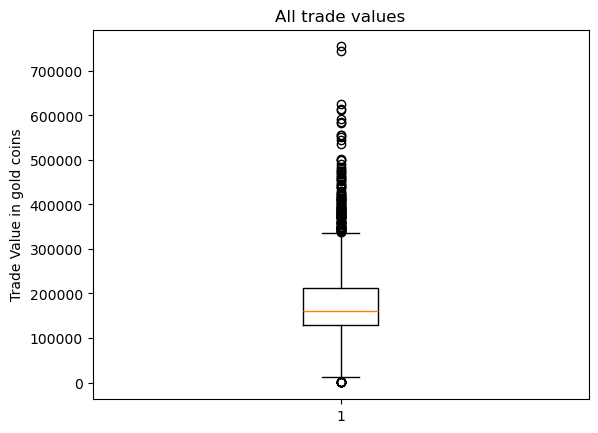

In [6]:
plt.boxplot(x=df['TradeValue'].dropna())
plt.title('All trade values')
plt.ylabel('Trade Value in gold coins')
plt.show()

In the ParcelSize column there are also very high outliers, as can be seen in the boxplot below.

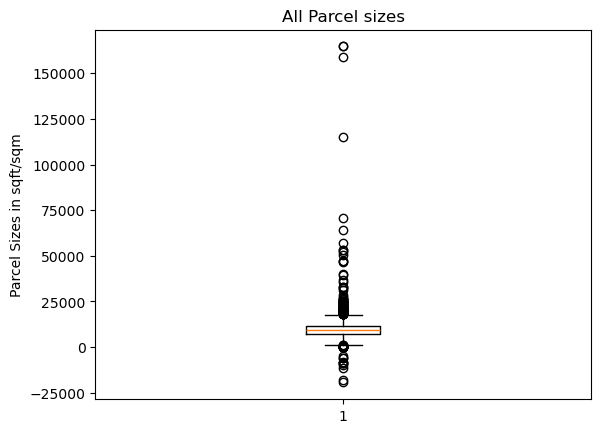

In [7]:
plt.boxplot(x=df['ParcelSize'].dropna())
plt.title('All Parcel sizes')
plt.ylabel('Parcel Sizes in sqft/sqm')
plt.show()

### 1.2 Histogram for TradeValue

In the histogram below you can see that the trade values are positively skewed. There are some very high outliers visible.

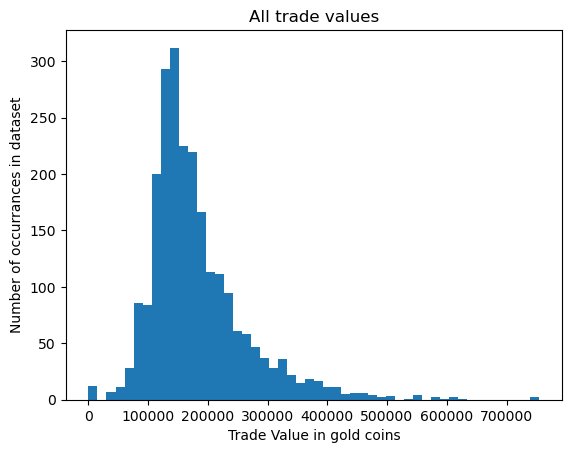

In [8]:
plt.hist(df["TradeValue"], bins=50)
plt.title('All trade values')
plt.xlabel('Trade Value in gold coins')
plt.ylabel('Number of occurrances in dataset')
plt.show()

### 1.3 Checking for data quality issues within the dataset

As you can see in the sample of our dataframe below, there is a row which has NAN instead of a number in the LivingQuarter column.

In [9]:
df.sample(30)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
1418,1405,135000.0,GnomeBurough,Petalbridge,903.0,9000.00000,sqft
964,956,110000.0,GnomeBurough,Petalbridge,987.0,3500.00000,sqft
1495,1480,185000.0,Meadowlands,Windwhisper,1635.0,28698.00000,sqft
713,705,154000.0,Meadowlands,Dragonspire,887.0,11000.00000,sqft
281,280,135000.0,Meadowlands,Dragonspire,711.0,8125.00000,sqft
1616,1600,140000.0,GnomeBurough,Shadowmere,NaN,3675.00000,sqft
501,498,475000.0,GnomeBurough,Petalbridge,2775.0,22950.00000,sqft
1103,1093,385000.0,Meadowlands,Silverglen,1603.0,14803.00000,sqft
769,761,163000.0,Meadowlands,Dragonspire,1047.0,10197.00000,sqft
1893,1874,168500.0,AetherIsles,Wyverncliff,1163.0,2117.00000,sqft


Below we are checking for cells with the value NAN (not a number), we already knew LivingQuarter had atleast one, so it is good practice to check if there are more columns/rows containing that. 

In [10]:
df.isna().sum()

DI                  0
TradeValue          0
RealmType           0
Enclave             0
LivingQuarters    118
ParcelSize          0
ParcelSizeUnit      0
dtype: int64

Checking for potential duplicates or spelling issues within the realm types or enclaves. As you can see in the enclaves there are quite a few duplicates as can be seen with the value counts. Some enclaves also occur multiple times, but with different spelling. 

In [11]:
df['RealmType'].unique()

array(['Meadowlands', 'GnomeBurough', 'AetherIsles', 'ArcaneMarket',
       'CitadelQuarter'], dtype=object)

In [12]:
df['RealmType'].value_counts()

RealmType
Meadowlands       1838
GnomeBurough       376
AetherIsles        111
ArcaneMarket        19
CitadelQuarter      19
Name: count, dtype: int64

In [13]:
df['Enclave'].unique()

array(['Dragonspire', 'Petalbridge', 'Shadowmere', 'Emberfall',
       'Mystvale', 'Nighthaven', 'Crystalhollow', 'Brightforge',
       'Wyverncliff', 'Riverbend', 'Starfall', 'Duskwood', 'Sunspire',
       'Silverglen', 'Stormwatch', 'Wolfsbane', 'Thornfield',
       'Ravenstone', 'Stormhold', 'Dreamweaver', 'Glimmerwood',
       'Wolfsbanes', 'Windwhisper', 'Mossheart', 'Moonglade',
       'Oakenshade', 'Verdantia', 'DUSKWOOD', 'Crystalhollows',
       'cloudrest', 'DRAGONSPIRE', 'dreamweaver', 'Cloudrest',
       'SHADOWMERE', 'sunspire', 'dragonspire', 'WYVERNCLIFF',
       'PETALBRIDGE', 'Duskwoods', 'windwhisper', 'Brightforges',
       'RAVENSTONE', 'silverglen', 'SILVERGLEN', 'petalbridge',
       'Shadowmeres', 'crystalhollow'], dtype=object)

In [14]:
df['Enclave'].value_counts()

Enclave
Dragonspire       351
Sunspire          214
Petalbridge       190
Shadowmere        156
Wyverncliff       146
Silverglen        132
Duskwood          132
Emberfall         119
Nighthaven        103
Brightforge       100
Stormwatch         90
Crystalhollow      89
Thornfield         83
Mystvale           72
Ravenstone         58
Glimmerwood        55
Riverbend          44
Stormhold          40
Windwhisper        37
Wolfsbane          29
Starfall           25
Dreamweaver        21
Mossheart          19
Cloudrest          17
Oakenshade          9
Verdantia           6
Moonglade           2
dragonspire         2
sunspire            2
dreamweaver         2
Brightforges        2
DRAGONSPIRE         1
cloudrest           1
Crystalhollows      1
DUSKWOOD            1
Wolfsbanes          1
SHADOWMERE          1
PETALBRIDGE         1
WYVERNCLIFF         1
Duskwoods           1
windwhisper         1
RAVENSTONE          1
silverglen          1
SILVERGLEN          1
petalbridge         1
Sh

Here we are checking if the parcel size unit is consistent

In [15]:
df['ParcelSizeUnit'].unique()

array(['sqft', 'sqm'], dtype=object)

Checking for duplicated values

In [16]:
df.duplicated().sum()

np.int64(23)

An additional check for outliers can be seen below.

In [17]:
df['TradeValue'].sort_values().head(30)

496        61.5
1240       99.5
1002      127.0
184       129.5
1270      140.0
688       140.2
623       174.0
1636      215.0
147       227.0
1126      255.5
1184      610.0
2226    12789.0
156     34900.0
16      35311.0
851     37900.0
475     39300.0
871     40000.0
488     44000.0
1348    45000.0
1168    46500.0
1890    50138.0
1996    51689.0
1282    52000.0
1499    52500.0
110     55000.0
1226    55993.0
699     58500.0
763     59000.0
2066    60000.0
1820    60000.0
Name: TradeValue, dtype: float64

### 1.4 Checking the differences in ParcelSizeUnit in more detail

In [18]:
dfm = df.loc[df['ParcelSizeUnit'] == 'sqm']

In [19]:
dfft = df.loc[df['ParcelSizeUnit'] == 'sqft']

In [20]:
dfm['LivingQuarters'].mean()

np.float64(1154.8095238095239)

In [21]:
dfft['LivingQuarters'].mean()

np.float64(1157.0930755395684)

In [22]:
dfm['ParcelSize'].mean()

np.float64(995.5808620869564)

In [23]:
dfft['ParcelSize'].mean()

np.float64(9977.22351211111)

In [24]:
dfm['TradeValue'].mean()

np.float64(192136.13043478262)

In [25]:
dfft['TradeValue'].mean()

np.float64(181042.59025641024)

## 2. Data preparation

### 2.1 Fixing issues within the ParcelSize & ParcelSizeUnit columns

First flipping the sign on all the negative sized parcels

In [26]:
df["ParcelSize"] = df["ParcelSize"].abs()

In [27]:
df.describe()

,DI,TradeValue,LivingQuarters,ParcelSize
count,2363.000000,2363.000000,2245.000000,2363.000000
mean,1169.813796,181150.568007,1157.071715,9982.670918
std,675.447687,82165.603916,392.780821,7837.981638
min,0.000000,61.500000,256.000000,0.043300
25%,584.500000,129825.000000,871.000000,7298.500000
50%,1170.000000,160000.000000,1116.000000,9345.000000
75%,1753.500000,213000.000000,1341.000000,11485.500000
max,2339.000000,755000.000000,4339.000000,164660.000000


In [28]:
df.sort_values(by=["ParcelSize"]).head(50)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
1240,1229,99.5,GnomeBurough,Mystvale,1011.0,0.043300,sqft
688,680,140.2,Meadowlands,Stormwatch,1213.0,0.064350,sqft
496,493,61.5,Meadowlands,Shadowmere,NaN,0.068820,sqft
1270,1259,140.0,GnomeBurough,Petalbridge,719.0,0.072000,sqft
147,146,227.0,Meadowlands,Nighthaven,1280.0,0.084000,sqft
1002,993,127.0,Meadowlands,Shadowmere,1177.0,0.093500,sqft
184,183,129.5,GnomeBurough,Petalbridge,1583.0,0.096000,sqft
1126,1116,255.5,Meadowlands,Silverglen,1320.0,0.111460,sqft
1636,1620,215.0,Meadowlands,Crystalhollow,1508.0,0.122090,sqft
623,616,174.0,Meadowlands,Duskwood,1141.0,0.125890,sqft


For the initial sqft ones, multiply the tradevalue and parcelsize by 1000, keep the rest the same
For the sqm ones after that, their size to value ratio would make sense if they were converted to sqft
From there on I think it's fine

First the conversion from sqm to sqft

In [29]:
df['ParcelSize'] = df.apply(lambda x: x['ParcelSize'] * 10.7639 if x['ParcelSizeUnit'] == 'sqm' else x['ParcelSize'], axis=1)

Then making sure they're classified as sqft in the parcel size unit column

In [30]:
df.replace(to_replace='sqm', value='sqft', inplace=True)

### 2.2 Fixing extremely low TradeValues & ParcelSize outliers

Multiplying the trade value on the outliers by 1000 to make them around median, or, at least, for them to have logical values

In [31]:
df['TradeValue'] = df.apply(lambda x: x['TradeValue'] * 1000 if x['ParcelSize'] < 1 else x['TradeValue'], axis=1)

Same thing, except the parcel size is multiplied by 100000 instead to reach the median level

In [32]:
df['ParcelSize'] = df['ParcelSize'].apply(lambda x: x * 100000 if x < 1 else x)

And a couple checks to make sure everything got processed correctly

In [33]:
df.sort_values(by=["ParcelSize"]).head(15)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
888,880,73000.0,GnomeBurough,Wolfsbane,484.0,1470.0,sqft
1739,1722,76000.0,GnomeBurough,Wolfsbane,839.0,1476.0,sqft
1889,1870,98000.0,GnomeBurough,Wolfsbane,839.0,1477.0,sqft
771,763,80000.0,GnomeBurough,Wolfsbane,484.0,1477.0,sqft
2023,2003,137000.0,GnomeBurough,Oakenshade,945.0,1488.0,sqft
516,512,93900.0,GnomeBurough,Wolfsbane,839.0,1495.0,sqft
563,557,85500.0,GnomeBurough,Wolfsbane,839.0,1504.0,sqft
1263,1252,86000.0,GnomeBurough,Wolfsbane,484.0,1526.0,sqft
892,884,79500.0,GnomeBurough,Wolfsbane,839.0,1526.0,sqft
1234,1223,87550.0,GnomeBurough,Wolfsbane,839.0,1533.0,sqft


In [34]:
df['ParcelSizeUnit'].unique()

array(['sqft'], dtype=object)

And what was an outlier now looks about average in terms of value and size

In [35]:
df.loc[1240]

DI                        1229
TradeValue             99500.0
RealmType         GnomeBurough
Enclave               Mystvale
LivingQuarters          1011.0
ParcelSize              4330.0
ParcelSizeUnit            sqft
Name: 1240, dtype: object

### 2.3 Removing extremely high outliers (above 700.000) from dataset.

In [36]:
df = df[df['TradeValue'] < 700000]

In [37]:
df.describe()

,DI,TradeValue,LivingQuarters,ParcelSize
count,2361.000000,2361.000000,2243.000000,2361.000000
mean,1170.072003,181590.772130,1155.088720,10113.216288
std,675.643771,80151.143896,387.291918,7784.631817
min,0.000000,12789.000000,256.000000,1470.000000
25%,584.000000,130000.000000,870.500000,7436.000000
50%,1171.000000,160500.000000,1115.000000,9375.000000
75%,1754.000000,213000.000000,1339.500000,11512.000000
max,2339.000000,625000.000000,4339.000000,164660.000000


### 2.4 Fixing the Enclave spelling & duplication issues

Here, fix the enclave name typos

In [38]:
df["Enclave"] = df["Enclave"].str.lower()

/tmp/ipykernel_9362/2910308930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Enclave"] = df["Enclave"].str.lower()


In [39]:
df["Enclave"] = df["Enclave"].str.title()

/tmp/ipykernel_9362/3562705285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Enclave"] = df["Enclave"].str.title()


In [40]:
df['Enclave'] = df['Enclave'].str.rstrip('s')

/tmp/ipykernel_9362/967876523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Enclave'] = df['Enclave'].str.rstrip('s')


In [41]:
df['Enclave'].sort_values().unique()

array(['Brightforge', 'Cloudrest', 'Crystalhollow', 'Dragonspire',
       'Dreamweaver', 'Duskwood', 'Emberfall', 'Glimmerwood', 'Moonglade',
       'Mossheart', 'Mystvale', 'Nighthaven', 'Oakenshade', 'Petalbridge',
       'Ravenstone', 'Riverbend', 'Shadowmere', 'Silverglen', 'Starfall',
       'Stormhold', 'Stormwatch', 'Sunspire', 'Thornfield', 'Verdantia',
       'Windwhisper', 'Wolfsbane', 'Wyverncliff'], dtype=object)

Here, all the duplicated

### 2.5 Removing duplicates from dataset.

In [42]:
df = df.drop_duplicates()

In [43]:
df.duplicated().sum()

np.int64(0)

### 2.6 Adjusting the Not a Number values in LivingQuarters. 

We are replacing the LivingQuarter values that are currently NAN with the median. Below you can see a check that the rest of the values in these rows are very logical, meaning that this adjustment is the better option rather than discarding all the rows with NAN values. 

In [44]:
df.loc[df['LivingQuarters'].isna()].sample(30)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
1616,1600,140000.0,GnomeBurough,Shadowmere,NaN,3675.000000,sqft
2041,2021,140000.0,GnomeBurough,Sunspire,NaN,4435.000000,sqft
982,974,161900.0,Meadowlands,Stormhold,NaN,7804.000000,sqft
1958,1939,107400.0,GnomeBurough,Petalbridge,NaN,5790.000000,sqft
202,201,394432.0,Meadowlands,Riverbend,NaN,11393.984068,sqft
2344,2321,123000.0,Meadowlands,Sunspire,NaN,7200.000000,sqft
322,320,62383.0,Meadowlands,Emberfall,NaN,8281.000000,sqft
1206,1195,67000.0,GnomeBurough,Mystvale,NaN,8967.000000,sqft
1802,1784,340000.0,Meadowlands,Glimmerwood,NaN,16545.000000,sqft
626,619,151400.0,GnomeBurough,Wolfsbane,NaN,3964.000000,sqft


In [45]:
df['LivingQuarters'] = df['LivingQuarters'].fillna(df['LivingQuarters'].median())

Below you can see our check to see if there are still NAN values in the dataset, which is not the case.

In [46]:
df.loc[df['LivingQuarters'].isna()]

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit


In [47]:
df.loc[543]

DI                         537
TradeValue            140000.0
RealmType         GnomeBurough
Enclave            Petalbridge
LivingQuarters          1115.0
ParcelSize              5700.0
ParcelSizeUnit            sqft
Name: 543, dtype: object

## 3. Modelling

### 3.1 Creating the Model

In [48]:
features = df[['LivingQuarters', 'ParcelSize']]

target = df['TradeValue']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.30, random_state=3)

In [49]:
features_train.median()

LivingQuarters    1115.000000
ParcelSize        9464.993388
dtype: float64

In [50]:
target_train.median()

np.float64(160500.0)

In [51]:
value = target_train.median()

pred_train = [value] * len(target_train)

pred_test = [value] * len(target_test)

In [52]:
len(pred_train)

1636

### 3.2 Scatter plot for TradeValues

Here you can see a scatter plot of the enclaves and the trade value. You can see that some enclaves are generally more expensive than others. 

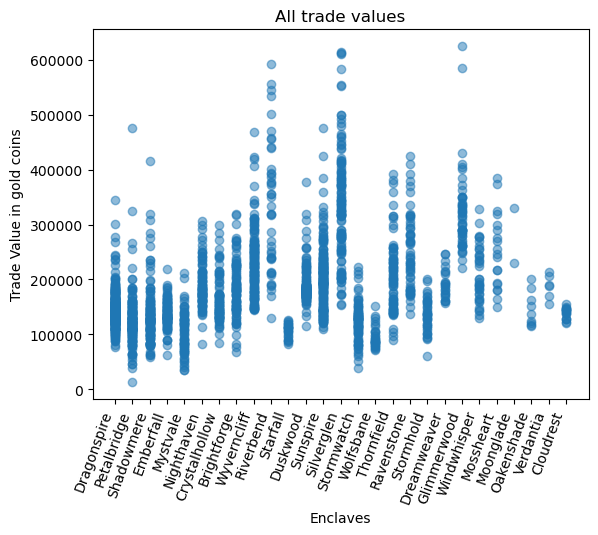

In [53]:
plt.scatter(df['Enclave'], df['TradeValue'], alpha=0.5)
plt.title('All trade values')
plt.xlabel('Enclaves')
plt.xticks(rotation = 70, ha = 'right')
plt.ylabel('Trade Value in gold coins')
plt.show()

Below you can see the scatter plot with the realm types and trade values, as you can see here some realms have a big range of trade values, while others are more within specific price ranges 

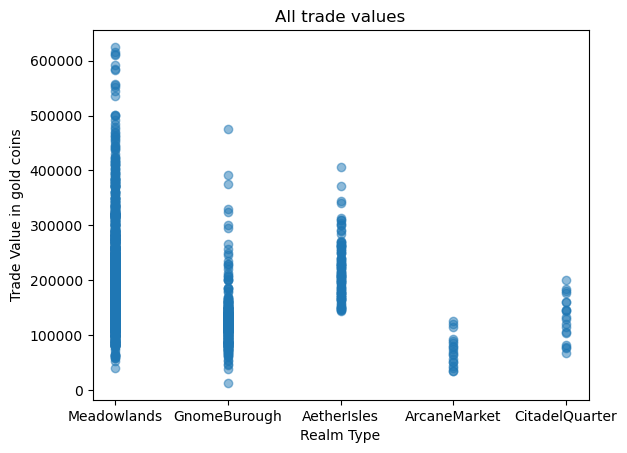

In [54]:
plt.scatter(df['RealmType'], df['TradeValue'], alpha=0.5)
plt.title('All trade values')
plt.xlabel('Realm Type')
plt.ylabel('Trade Value in gold coins')
plt.show()

## 4. Evaluation

### 4.1 Median Absolute Error

In [55]:
print('Median Absolute Error of train set:', median_absolute_error(pred_train, target_train))
print('Median Absolute Error of test set:', median_absolute_error(pred_test, target_test))

Median Absolute Error of train set: 37400.0
Median Absolute Error of test set: 35150.0


### 4.2 Mean Absolute Error

In [56]:
print('Mean Absolute Error of train set:', mean_absolute_error(pred_train, target_train))
print('Mean Absolute Error of test set:', mean_absolute_error(pred_test, target_test))

Mean Absolute Error of train set: 57535.959046454765
Mean Absolute Error of test set: 52880.42592592593


### 4.3 Mean Sqared Error

In [57]:
print('Mean Squared Error of train set:', mean_squared_error(pred_train, target_train))
print('Mean Squared Error of test set:', mean_squared_error(pred_test, target_test))

Mean Squared Error of train set: 7180807946.311125
Mean Squared Error of test set: 6131337293.890313
